In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path='/content/drive/MyDrive/Dataset/NUSW-NB15/'

# 讀取CSV檔案
data_train = pd.read_csv(file_path + 'training-set.csv')
data_test = pd.read_csv(file_path + 'testing-set.csv')

# 列出 dataset 的資訊
print("Training Data :", data_train.shape)
for column in data_train.columns:
    unique_values = data_train[column].unique()
    print(f"'{column}' ",end=" ")

print("\n", "Testing Data :", data_test.shape)
for column in data_test.columns:
    unique_values = data_test[column].unique()
    print(f"'{column}' ",end=" ")


Training Data : (82332, 45)
'id'  'dur'  'proto'  'service'  'state'  'spkts'  'dpkts'  'sbytes'  'dbytes'  'rate'  'sttl'  'dttl'  'sload'  'dload'  'sloss'  'dloss'  'sinpkt'  'dinpkt'  'sjit'  'djit'  'swin'  'stcpb'  'dtcpb'  'dwin'  'tcprtt'  'synack'  'ackdat'  'smean'  'dmean'  'trans_depth'  'response_body_len'  'ct_srv_src'  'ct_state_ttl'  'ct_dst_ltm'  'ct_src_dport_ltm'  'ct_dst_sport_ltm'  'ct_dst_src_ltm'  'is_ftp_login'  'ct_ftp_cmd'  'ct_flw_http_mthd'  'ct_src_ltm'  'ct_srv_dst'  'is_sm_ips_ports'  'attack_cat'  'label'  
 Testing Data : (175341, 45)
'id'  'dur'  'proto'  'service'  'state'  'spkts'  'dpkts'  'sbytes'  'dbytes'  'rate'  'sttl'  'dttl'  'sload'  'dload'  'sloss'  'dloss'  'sinpkt'  'dinpkt'  'sjit'  'djit'  'swin'  'stcpb'  'dtcpb'  'dwin'  'tcprtt'  'synack'  'ackdat'  'smean'  'dmean'  'trans_depth'  'response_body_len'  'ct_srv_src'  'ct_state_ttl'  'ct_dst_ltm'  'ct_src_dport_ltm'  'ct_dst_sport_ltm'  'ct_dst_src_ltm'  'is_ftp_login'  'ct_ftp_cmd'  

In [3]:
if 'id' in data_train.columns:
    data_train.drop(columns=['id'], inplace=True)
    print("'train_id' deleted")
    print("Training Data :", data_train.shape)
else:
    print("'train_iid' column does not exist")
if 'id' in data_test.columns:
    data_test.drop(columns=['id'], inplace=True)
    print("\n", "'test_id' deleted")
    print("Testing Data :", data_test.shape)
else:
    print("\n", "'test_id' column does not exist")

'train_id' deleted
Training Data : (82332, 44)

 'test_id' deleted
Testing Data : (175341, 44)


In [4]:
# 合併訓練集和測試集
merged_data = pd.concat([data_train, data_test], ignore_index=True)

# 儲存合併後的資料
#merged_data.to_csv(file_path +'merged_data.csv', index=False)

# 列出 merged_data 資料集的行數和列數
print("Data_info：", merged_data.shape)

print(merged_data.info())

Data_info： (257673, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 n

In [5]:
# 選擇要進行 One-Hot Encoding 的類別型特徵
categories = ['proto', 'service', 'state', 'attack_cat']

# 使用 get_dummies() 函數對類別型特徵進行 One-Hot Encoding
data_encoded = pd.get_dummies(merged_data, columns=categories)

merged_data.drop(columns=categories, inplace=True)

# 將 One-Hot Encoding 後的資料加回到 merged_data 中
merged_data = pd.concat([merged_data, data_encoded], axis=1)

# 顯示 merged_data 的部分資料以確認結果
print(merged_data.info())
print(pd.DataFrame(merged_data, columns=merged_data.columns).head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Columns: 247 entries, dur to attack_cat_Worms
dtypes: float64(22), int64(58), uint8(167)
memory usage: 198.3 MB
None
        dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   
2  0.000005      2      0    1068       0  200000.0051   254     0   
3  0.000006      2      0     900       0  166666.6608   254     0   
4  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  ...  attack_cat_Analysis  attack_cat_Backdoor  \
0  180363632.0    0.0  ...                    0                    0   
1  881000000.0    0.0  ...                    0                    0   
2  854400000.0    0.0  ...                    0                    0   
3  600000000.0    0.0  ...                    0                    0   
4  850400000.0    0.0  .

In [6]:
# 假設 'label' 目標屬性
X = merged_data.drop(columns=['attack_cat_DoS'])#label
y = merged_data['attack_cat_DoS']
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Columns: 246 entries, dur to attack_cat_Worms
dtypes: float64(22), int64(58), uint8(166)
memory usage: 198.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 257673 entries, 0 to 257672
Series name: attack_cat_DoS
Non-Null Count   Dtype
--------------   -----
257673 non-null  uint8
dtypes: uint8(1)
memory usage: 251.8 KB
None


In [7]:
from sklearn.preprocessing import StandardScaler

# 標準化資料
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 對特徵進行標準化

# 顯示標準化後的部分資料以確認結果
print(type(X_scaled))
print(X_scaled.shape)

<class 'numpy.ndarray'>
(257673, 246)


In [8]:
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# 將資料分割為訓練集和測試集（這裡以 80% 資料作為訓練集，20% 作為測試集）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化SGDClassifier模型
svm_model = SGDClassifier(loss='hinge', alpha=0.001, random_state=42, max_iter=1000)

# 定義小批次大小和迭代次數
batch_size = 128
num_iterations = 10

train_scores = []
test_scores = []

# 將標準化後的資料集分為小批次並使用Mini-batch進行迭代訓練
num_samples = len(X_train)

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")
    for i in tqdm(range(0, num_samples, batch_size), desc='Training'):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y))

    train_score = svm_model.score(X_train, y_train)  # 計算訓練集的性能指標
    test_score = svm_model.score(X_test, y_test)     # 計算測試集的性能指標
    train_scores.append(train_score)
    test_scores.append(test_score)

Iteration 1/10


Training: 100%|██████████| 1611/1611 [00:08<00:00, 190.40it/s]


Iteration 2/10


Training: 100%|██████████| 1611/1611 [00:09<00:00, 167.82it/s]


Iteration 3/10


Training: 100%|██████████| 1611/1611 [00:10<00:00, 160.62it/s]


Iteration 4/10


Training: 100%|██████████| 1611/1611 [00:07<00:00, 203.45it/s]


Iteration 5/10


Training: 100%|██████████| 1611/1611 [00:10<00:00, 159.20it/s]


Iteration 6/10


Training: 100%|██████████| 1611/1611 [00:08<00:00, 195.45it/s]


Iteration 7/10


Training: 100%|██████████| 1611/1611 [00:09<00:00, 166.17it/s]


Iteration 8/10


Training: 100%|██████████| 1611/1611 [00:09<00:00, 166.58it/s]


Iteration 9/10


Training: 100%|██████████| 1611/1611 [00:14<00:00, 108.53it/s]


Iteration 10/10


Training: 100%|██████████| 1611/1611 [00:16<00:00, 96.33it/s] 


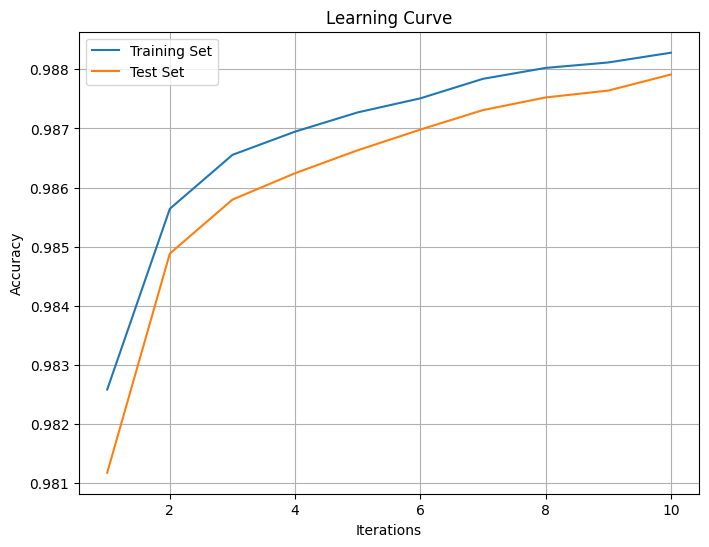

In [9]:
import matplotlib.pyplot as plt

# 繪製學習曲線
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), train_scores, label='Training Set')
plt.plot(range(1, num_iterations + 1), test_scores, label='Test Set')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# 進行 K-fold cross-validation for each evaluation metric
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

num_folds=10

for metric in scoring_metrics:
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv=num_folds, scoring=metric)
    avg_score = np.mean(cv_scores)
    for score in cv_scores:
        print(f"{score:.5f}", end=" ")
    print(f"\nAverage {num_folds}-fold cross-validation {metric}: {avg_score:.5f}", "\n")


0.99374 0.99190 0.99282 0.99462 0.99428 0.99365 0.99335 0.99345 0.99331 0.99403 
Average 10-fold cross-validation accuracy: 0.99351 

0.99412 0.99053 0.98820 0.99503 0.99010 0.99246 0.98668 0.98670 0.98911 0.99251 
Average 10-fold cross-validation precision: 0.99054 

0.90658 0.88055 0.89740 0.91960 0.91884 0.90658 0.90735 0.90888 0.90429 0.91271 
Average 10-fold cross-validation recall: 0.90628 

0.94834 0.93231 0.94061 0.95583 0.95314 0.94758 0.94535 0.94619 0.94480 0.95094 
Average 10-fold cross-validation f1: 0.94651 

0.99522 0.99534 0.99544 0.99632 0.99609 0.99532 0.99569 0.99578 0.99371 0.99624 
Average 10-fold cross-validation roc_auc: 0.99551 



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 預測測試集
pred_test = svm_model.predict(X_test)

print("Testing performance: ", "\n")

test_accuracy = accuracy_score(y_test, pred_test)
test_precision = precision_score(y_test, pred_test)
test_recall = recall_score(y_test, pred_test)
test_f1 = f1_score(y_test, pred_test)
test_roc_auc = roc_auc_score(y_test, pred_test)
test_conf_matrix = confusion_matrix(y_test, pred_test)

print(f"Accuracy: {test_accuracy*100:.4f}%", "\n")
print(f"Precision: {test_precision*100:.4f}%", "\n")
print(f"Recall: {test_recall*100:.4f}%", "\n")
print(f"F1-Score: {test_f1*100:.4f}%", "\n")
print(f"ROC AUC: {test_roc_auc*100:.4f}%", "\n")
print("Confusion Matrix:")
print(test_conf_matrix)

Testing performance:  

Accuracy: 98.7911% 

Precision: 98.2298% 

Recall: 82.5691% 

F1-Score: 89.7212% 

ROC AUC: 91.2338% 

Confusion Matrix:
[[48193    49]
 [  574  2719]]


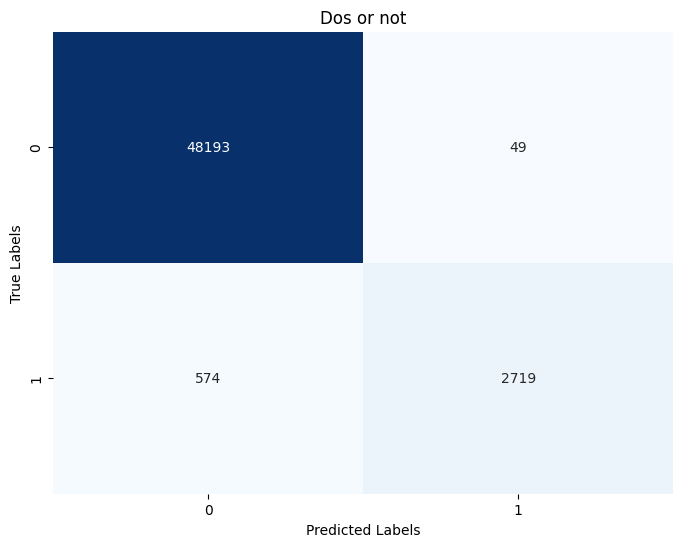

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 假設你已經計算了模型效能指標
# test_conf_matrix 是你的混淆矩陣
# test_accuracy, test_precision, test_recall, test_f1, test_roc_auc 是你的效能指標

# 繪製 Confusion Matrix 的熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Dos or not")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

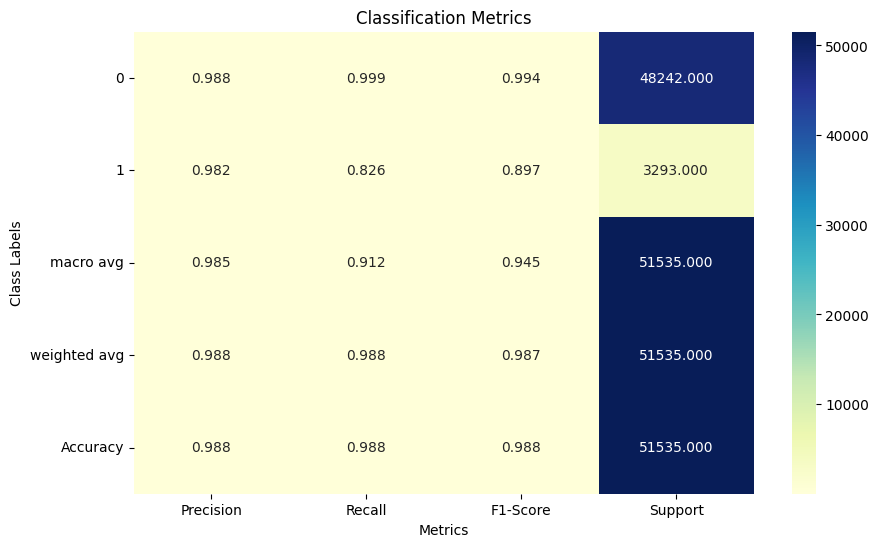

In [14]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 pred_test 是你的預測結果，y_test 是真實的標籤
# 使用 classification_report 來獲取每個類別的 Precision、Recall、F1-Score 和 Support
report = classification_report(y_test, pred_test, target_names=["0", "1"], output_dict=True)

# 計算 Accuracy
acc = accuracy_score(y_test, pred_test)

# 從 classification_report 的輸出中獲取每個類別和平均指標的值
class_labels = ["0", "1", "macro avg", "weighted avg"]

# 提取 Precision、Recall、F1-Score、Support 的數值
metrics_values = []
for label in class_labels:
    values = [
        report[label]['precision'],
        report[label]['recall'],
        report[label]['f1-score'],
        report[label]['support']
    ]
    metrics_values.append(values)

# 處理 Accuracy 的數值，加入到 metrics_values 中
acc_values = [acc, acc, acc, np.sum([report[label]['support'] for label in class_labels[:-2]])]  # 加入 Accuracy 到 metrics_values
metrics_values.append(acc_values)

# 繪製熱圖
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_values, annot=True, cmap="YlGnBu", cbar=True, fmt=".3f")
plt.xticks(ticks=np.arange(4) + 0.5, labels=["Precision", "Recall", "F1-Score", "Support"])
plt.yticks(ticks=np.arange(len(class_labels) + 1) + 0.5, labels=class_labels + ["Accuracy"], rotation=0)
plt.title("Classification Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class Labels")
plt.show()


In [15]:
"""
import joblib
save=input("儲存模型:(y/n)")

if save == 'y':
  joblib.dump(svm_model, file_path + 'svm_model.pkl')
  print("Saved!")
elif save =='n':
  print("Done!")
else:
  print("Error!")

"""

'\nimport joblib\nsave=input("儲存模型:(y/n)")\n\nif save == \'y\':\n  joblib.dump(svm_model, file_path + \'svm_model.pkl\')\n  print("Saved!")\nelif save ==\'n\':\n  print("Done!")\nelse:\n  print("Error!")\n\n'

In [16]:
import pkg_resources

installed_packages = pkg_resources.working_set

for package in installed_packages:
    print(f"{package.key}=={package.version}")


babel==2.14.0
cython==3.0.6
flask==2.2.5
gdal==3.4.3
jinja2==3.1.2
markdown==3.5.1
markupsafe==2.1.3
pillow==9.4.0
pydrive==1.3.1
pydrive2==1.6.3
pyopengl==3.1.7
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.16.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.17.0
bleach==6.1.0
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
cachecontrol==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
color